# Holdout Validation

------

## 0. data 불러오기

### 1) 부르기

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 35s 3us/step


In [3]:
X_test.shape

(10000, 28, 28)

#### 이런 걸 어떻게 바로 알고 함?

1> shift + tab => Returns: Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test)

2> 공식 홈페이지 

keras 공식 홈페이지: https://keras.io/datasets/#mnist-database-of-handwritten-digits

tensorflow 공식 홈페이지 설명은 부실하다.

### 2) 이들은 무엇인가? - X_train

X_train -> nd array -> 모를 땐? 

#### shape !!!

In [4]:
X_train.shape

(60000, 28, 28)

지난 시간 X_train이 이미지였다. **(209, 64, 64, 3)** => (data 개수, 세로 픽셀, 가로 픽셀, channel수)

그럼 지금은?

- **X_train** => (28, 28)짜리 data가 60000개 있다.

- **X_train[0]** => X_train 60000개 중 첫 번째 이미지


그려보자 => plt.imshow (지난 3주차 과제에서 언급했습니다.)

    (matplotlib은 9주차에 제대로 강의할 예정이니 걱정하지 않아도 됩니다.)

TMI: X는 대문자고 y는 소문자 / X는 4d array이고 y는 vector여서

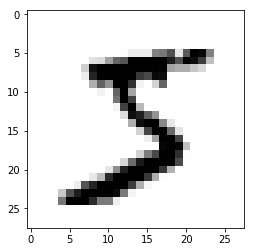

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.imshow(X_train[0], cmap=plt.cm.binary)

### 3) 이들은 무엇인가? - y_train

당연히 label(y)일 것이다.

그래도 shape 찍어보겠습니다.

In [6]:
y_train.shape

(60000,)

In [7]:
y_train[0]

5

60000개의 이미지가 있으니 60000개의 label이 있다.

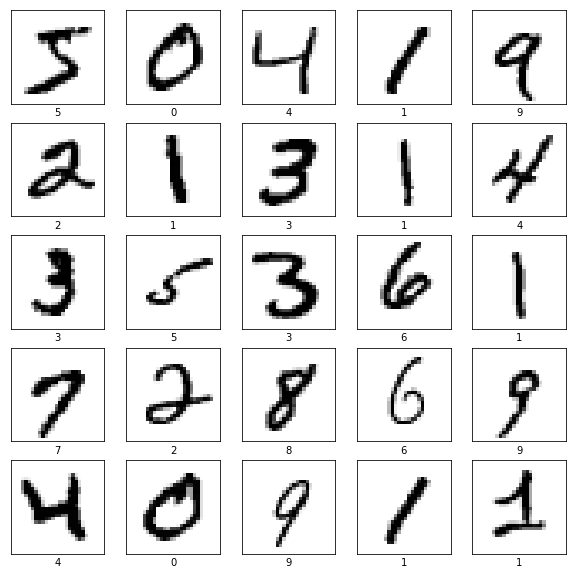

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(str(y_train[i]))
plt.show()

------------

In [9]:
X_train.shape

# 분할 작업: 50000,10000,10000

(60000, 28, 28)

본론: 이들을 50000개는 train set에, 10000개는 test set에 넣고 싶다.

## 1. Holdout 기법 - slicing 

### 0) warm up

In [10]:
import numpy as np

In [11]:
a = np.arange(30).reshape(6,5)

In [12]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

6개의 행을 5개와 1개로 slicing 하고 싶다.

In [13]:
a_train = a[:5]

In [14]:
a_train

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [15]:
a_test = a[5:]

In [16]:
a_test

array([[25, 26, 27, 28, 29]])

### 1) 실습

In [17]:
X_train_train = X_train[:50000]

In [18]:
X_train_train.shape

(50000, 28, 28)

In [19]:
X_train_val = X_train[50000:]

In [20]:
X_train_val.shape

(10000, 28, 28)

--------

## 2. scikit-learn의 train_test_split

### 0) 기본 개념

#### 사이킷런: ML framework

딥러닝의 tensorflow라고 생각하면 된다.

**공식 문서:** https://scikit-learn.org/stable/

### 1) 간단한 설명

여러 split 기법들이 있지만 지원되는 기능이 많아 가장 많이 사용된다.

In [21]:
from sklearn.model_selection import train_test_split

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

train_test_split / shift + tab

1) *arrays = split할 대상 -> X_train  (동시에 2개 이상 넣어도 된다는 말이다.)

2) test_size = test 부분에(validation 부분에) split할 비율 (0과 1사이) -> 0.16666

3) train_size (test_size를 설정했다면 사용하지 않아도 된다.)

4) random_state = random하게 자르는데 seed 값 (None하면 seed를 random하게 선택)

(data split 성공적으로 될 경우를 유지하기 위해 seed 값을 고정시키는 경우가 있다.)

5) shuffle = data를 섞고서 자를지 말지

6) stratified = y의 비율을 일정하게 분배할지 (나중에 중요한 내용이므로 다시 다루겠습니다.)

In [22]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [23]:
#왼 train, 오 test 
x, y = train_test_split(a, train_size = 0.667, random_state = 3)

In [24]:
x

array([[20, 21, 22, 23, 24],
       [ 5,  6,  7,  8,  9],
       [ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14]])

In [25]:
y

array([[15, 16, 17, 18, 19],
       [25, 26, 27, 28, 29]])

In [26]:
b = np.arange(100, 124).reshape(6,4)

In [27]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [28]:
b

array([[100, 101, 102, 103],
       [104, 105, 106, 107],
       [108, 109, 110, 111],
       [112, 113, 114, 115],
       [116, 117, 118, 119],
       [120, 121, 122, 123]])

In [31]:
x1, y1, x2, y2 = train_test_split(a,b, test_size = 2/3, random_state = 3)

In [32]:
x2

array([[100, 101, 102, 103],
       [108, 109, 110, 111]])

### 2) 실습

In [33]:
X_train.shape

(60000, 28, 28)

In [34]:
y_train.shape

(60000,)

In [35]:
X_train_, X_val, y_train_, y_test = train_test_split(X_train, y_train, test_size=0.16666)

In [36]:
X_train_.shape

(50000, 28, 28)

In [37]:
y_train_.shape

(50000,)

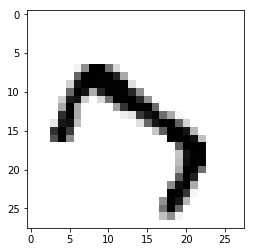

In [38]:
plt.imshow(X_train_[0], cmap=plt.cm.binary)

In [39]:
y_train_[0]

7